Importing of libraries needed

In [871]:
import pandas as pd
import numpy as np

In [872]:
import seaborn as sns
import matplotlib.pyplot as plt

In [873]:
%matplotlib inline

In [665]:
# Load the training data
data = pd.read_csv('Housing_dataset_train.csv')

In [666]:
# Load the testing data
data2 = pd.read_csv('Housing_dataset_test.csv')

 Checking the shape and first few rows of the training dataset

In [667]:
data.shape

(14000, 7)

In [668]:
data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [669]:
# Check for missing values in the training dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 656.3+ KB


Checking the number of unique values

In [670]:
data['loc'].nunique()

36

In [671]:
data['loc'].unique()

array(['Katsina', 'Ondo', 'Ekiti', 'Anambra', 'Kogi', 'Borno', 'Kwara',
       'Osun', 'Kaduna', 'Ogun', 'Bayelsa', nan, 'Abia', 'Rivers',
       'Taraba', 'Ebonyi', 'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Delta',
       'Kano', 'Yobe', 'Benue', 'Bauchi', 'Cross River', 'Niger',
       'Adamawa', 'Plateau', 'Imo', 'Oyo', 'Zamfara', 'Sokoto', 'Jigawa',
       'Gombe', 'Akwa Ibom', 'Lagos'], dtype=object)

In [516]:
data['title'].unique()

array(['Semi-detached duplex', 'Apartment', nan, 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

# Handling Missing Values

Grouping by location and getting the mean of each feature

In [674]:
data.groupby('loc').mean()

,ID,bedroom,bathroom,parking_space,price
loc,,,,,
Abia,5055.266026,4.131387,3.137931,3.373134,1.717083e+06
Adamawa,4405.217009,4.269625,3.020408,3.087108,1.905287e+06
Akwa Ibom,4781.866261,4.275261,3.090592,3.142349,2.725454e+06
Anambra,4951.118457,4.078689,3.058065,3.279365,2.337230e+06
Bauchi,4831.602339,4.435714,3.359060,3.130872,1.772961e+06
Bayelsa,4946.014706,4.429530,3.231293,3.044068,3.112322e+06
Benue,5062.014085,4.216828,3.268212,3.195364,1.920461e+06
Borno,5075.663818,4.391892,3.131313,3.105263,1.735704e+06
Cross River,4874.942693,4.496667,3.124567,3.118644,2.507765e+06


In [675]:
data.groupby('title').mean()

,ID,bedroom,bathroom,parking_space,price
title,,,,,
Apartment,4940.278738,4.344219,3.109862,3.285714,1.567004e+06
Bungalow,5005.518948,4.402852,3.394664,3.192619,1.733845e+06
Cottage,1767.420000,2.905512,1.510363,2.542714,1.307817e+06
Detached duplex,5002.801067,4.327840,3.232270,3.230906,2.205883e+06
Flat,4852.685860,4.378877,3.188295,3.146486,1.721875e+06
Mansion,4882.914523,4.333929,3.197880,3.115114,3.725768e+06
Penthouse,4945.607963,4.342982,2.986667,3.225177,2.628945e+06
Semi-detached duplex,4980.161663,4.414903,3.194770,3.202912,1.918468e+06
Terrace duplex,5152.398894,4.340639,3.292616,3.178505,1.927270e+06


## for categorical values 

In [677]:
#for generating random numbers
import random
# Creating a new list with that contains all the uniue values in the title column
b = list(data.title.unique())

#removes the value at inedex 2
b.remove(b[2]) #  removing the nan 

# Creating a new list with that contains all the uniue values in the loc column
a = list(data['loc'].unique())

#To randomly select any element from list a
random.choice(a)


#removes the value at index 11 i.e the nan values 
a.remove(a[11])

In [681]:
"""the location function is designed to handle missing or null location values by randomly selecting a new 
location from a list of valid locations (a). If the input location is not null, it returns the original location. """
def locate(location):
    if pd.isnull(location):
        new =  random.choice(a)
    else:
        new = location
    return new 

In [682]:
"""created the title function to handle missing or null location values by randomly selecting a new 
location from a list of valid locations (b). If the input title is not null, it returns the original location. """

def Title(title):
    if pd.isnull(title):
        new =  random.choice(b)
    else:
        new = title
    return new 

In [683]:
# Created to two new columns based of the dataframe containing tranformed values of the title and loc column
data['location'] = data['loc'].apply(locate)
data['Title'] = data['title'].apply(Title)

## for numeric Values 
* bedroom
* bathroom
* parking space


### bedroom 

In [686]:
# To calculate the mean of bedroom column
column_mean = data['bedroom'].mean()

# To round up the mean value to a whole number
Rnd = round(column_mean)

In [687]:
# Replacing Null values with corresponding rounded up column mean
data['bedroom'].fillna(Rnd, inplace=True)

### parking space 

In [688]:
# To calculate the mean of parking space column
column_mean2 = data['parking_space'].mean()

In [689]:
# To round up the mean value to a whole number
Rnd2= round(column_mean)

In [690]:
# Replacing Null values with corresponding rounded up column mean
data['parking_space'].fillna(Rnd, inplace=True)

### bathroom

In [691]:
# To calculate the mean of bathroom column
column_mean3 = data['bathroom'].mean()
# To round up mean value
Rnd3= round(column_mean3)

In [692]:
# Replacing Null values with corresponding rounded up column mean
data['bathroom'].fillna(Rnd, inplace=True)

In [693]:
# To check for duplicate rows
duplicate_rows= data.duplicated()

In [694]:
# To count number of duplicate rows in the training dataset,this is showing there in none.
duplicate_rows.sum()

0

In [695]:
# To check for duplicate rows in the testing dataset.
duplicate_rows= data2.duplicated()

In [696]:
# To count number of duplicate rows in the testing dataset,this is showing there in none.
duplicate_rows.sum()

0

# After handling the missing values, filling all  null values of numerical data with the mean of the respective columns and missing text data with random.

In [697]:
# There are no Null values in the data set anymore
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        14000 non-null  float64
 4   bathroom       14000 non-null  float64
 5   parking_space  14000 non-null  float64
 6   price          14000 non-null  float64
 7   location       14000 non-null  object 
 8   Title          14000 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 765.7+ KB


# Exploratory Data Analysis

In [698]:
#This shows a wide range of satitical information
data.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,14000.000000,14000.000000,14000.000000,1.400000e+04
mean,4862.700357,4.268571,3.245857,3.277214,2.138082e+06
std,3818.348214,2.281249,1.922191,1.518162,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,3.000000,2.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,3.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,4.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [701]:
## comparing the "title" column with null values with the "Title" comumn withut null values  

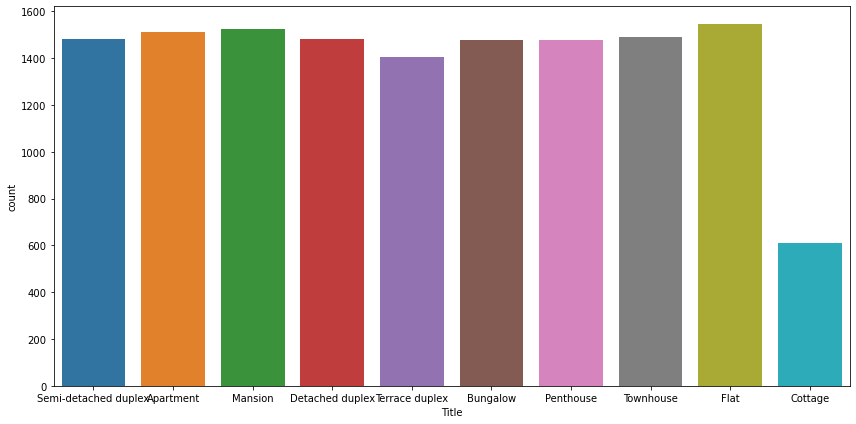

In [702]:
'''created the count plot to display the number of occurrences of each unique value in the 'title'
column as bars in the plot.'''
plt.figure(figsize=(12,6))
sns.countplot(x = data['Title'])
plt.tight_layout()
plt.show()

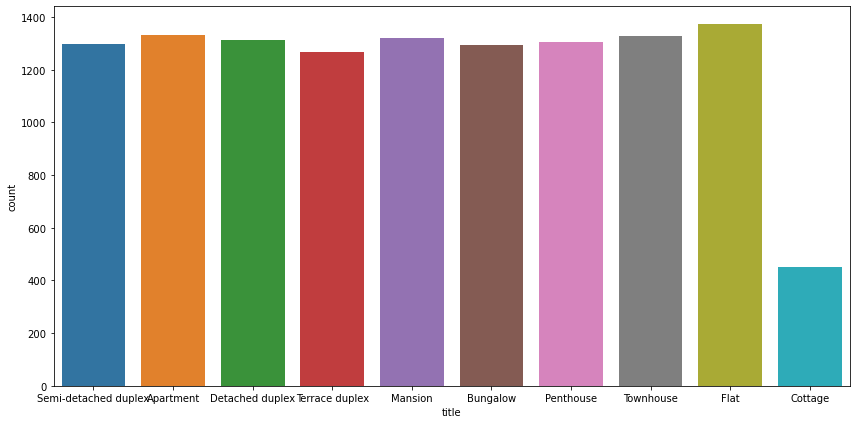

In [703]:
'''created the count plot to display the number of occurrences of each unique value in the 'loc'
column as bars in the plot.'''
plt.figure(figsize=(12,6))
sns.countplot(x = data['title'])
plt.tight_layout()
plt.show()

since the plot llook almost the same, them the decision to fill in missing vlaues wih random values 

In [704]:
#created a new dataframe 
new_data = data.drop(['loc','title'],axis=1)

In [705]:
new_data.head()

,ID,bedroom,bathroom,parking_space,price,location,Title
0,3583,2.0,2.0,1.0,1149999.565,Katsina,Semi-detached duplex
1,2748,4.0,2.0,4.0,1672416.689,Ondo,Apartment
2,9261,7.0,5.0,4.0,3364799.814,Ekiti,Mansion
3,2224,5.0,2.0,4.0,2410306.756,Anambra,Detached duplex
4,10300,4.0,5.0,6.0,2600700.898,Kogi,Terrace duplex


<AxesSubplot:xlabel='bathroom', ylabel='bedroom'>

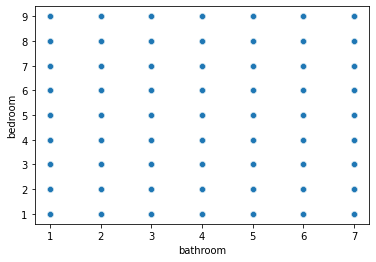

In [706]:
# very little correlation between the features below
sns.scatterplot(data = new_data, x = 'bathroom',y='bedroom')

<AxesSubplot:>

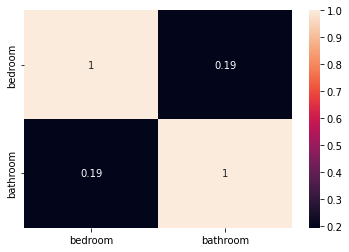

In [707]:
#showing correlation between the features below
sns.heatmap(data[['bedroom','bathroom']].corr(),annot=True)

price against bedroom

<AxesSubplot:xlabel='bedroom', ylabel='price'>

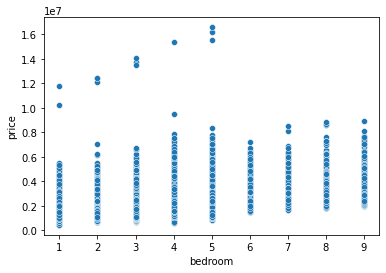

In [708]:

sns.scatterplot(data=new_data, y = 'price',x = 'bedroom')

price against bathroom

<AxesSubplot:xlabel='bathroom', ylabel='price'>

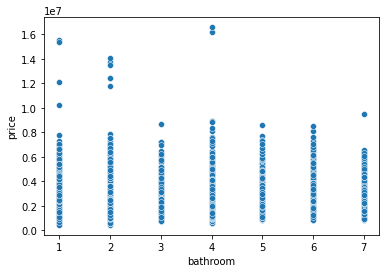

In [709]:
sns.scatterplot(data=new_data, y = 'price',x = 'bathroom')

price againt parking_space

<AxesSubplot:xlabel='parking_space', ylabel='price'>

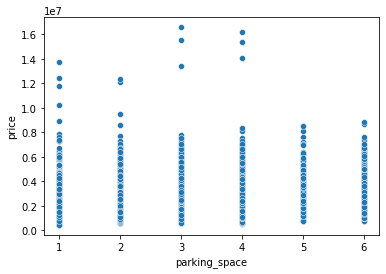

In [710]:
sns.scatterplot(data=new_data, y = 'price',x = 'parking_space')

## still on price and title

In [712]:
''' 't' is a DataFrame that shows the mean values of each numerical column in new_data, 
grouped by the unique values in the 'Title' column.'''
t = new_data.groupby('Title').mean()

In [713]:
# used to sort the DataFrame t based on the values in the 'price' column in ascending order.
t.sort_values(by='price',ascending=True, inplace = True)

In [714]:
#Assigned the index value of 't' to a new variable
order = t.index
order

Index(['Cottage', 'Apartment', 'Flat', 'Bungalow', 'Semi-detached duplex',
       'Terrace duplex', 'Townhouse', 'Detached duplex', 'Penthouse',
       'Mansion'],
      dtype='object', name='Title')

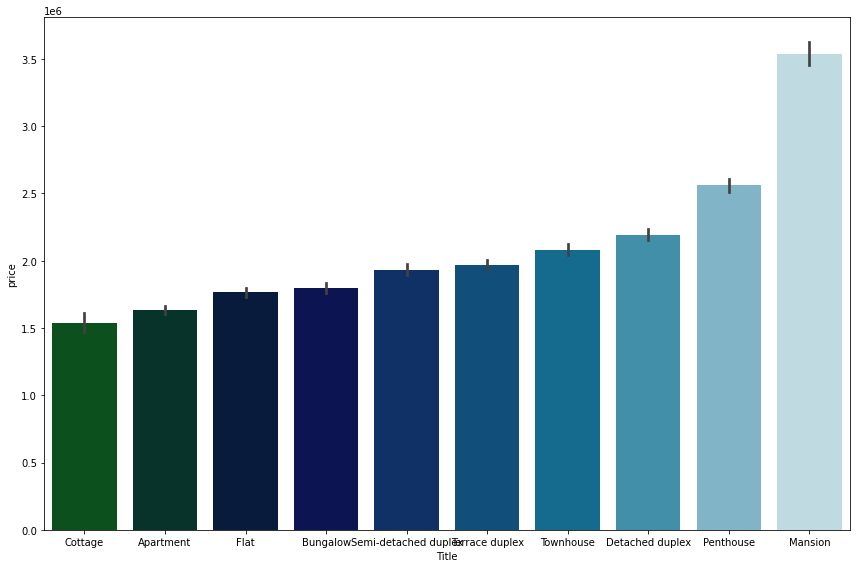

In [717]:
plt.figure(figsize=(12,8))
sns.barplot(data=new_data,x='Title',y = 'price',order = order,palette='ocean')
plt.tight_layout()
plt.show()

## price and location

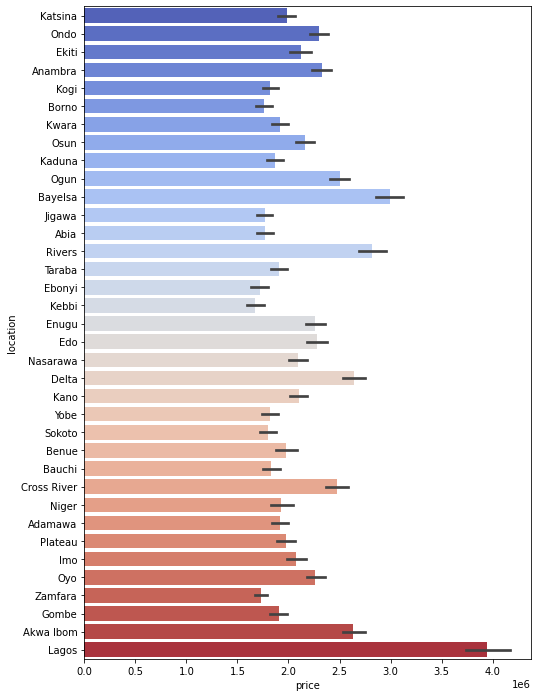

In [723]:
plt.figure(figsize=(8,12))
sns.barplot(data=new_data,y='location',x = 'price',palette = 'coolwarm')
plt.show()

Histogram

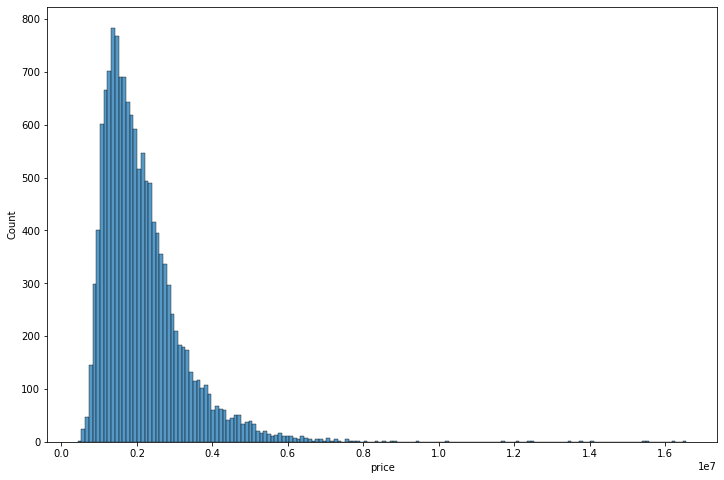

In [724]:
plt.figure(figsize=(12,8))
sns.histplot(data['price'])

plt.show()


<AxesSubplot:xlabel='price', ylabel='Count'>

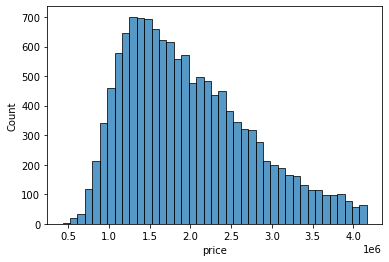

In [727]:
'''generates a histogram of house prices from the new_data DataFrame, but only for prices that
are above the threshold 4169269.364.'''
sns.histplot(new_data[new_data['price']<4169269.364]['price'])

## current working dataframe "model_data"
* hello

In [804]:
'''creating a new dataframe that will contain only the rows from new_data where the 'price' is
less than 4169269.364.'''
model_data = new_data[new_data['price']<4169269.364]

In [805]:
model_data['location'].unique()

array(['Katsina', 'Ondo', 'Ekiti', 'Anambra', 'Kogi', 'Borno', 'Kwara',
       'Osun', 'Kaduna', 'Ogun', 'Bayelsa', 'Jigawa', 'Abia', 'Rivers',
       'Taraba', 'Ebonyi', 'Kebbi', 'Enugu', 'Edo', 'Nasarawa', 'Delta',
       'Kano', 'Yobe', 'Sokoto', 'Benue', 'Bauchi', 'Cross River',
       'Niger', 'Adamawa', 'Plateau', 'Imo', 'Oyo', 'Zamfara', 'Gombe',
       'Akwa Ibom', 'Lagos'], dtype=object)

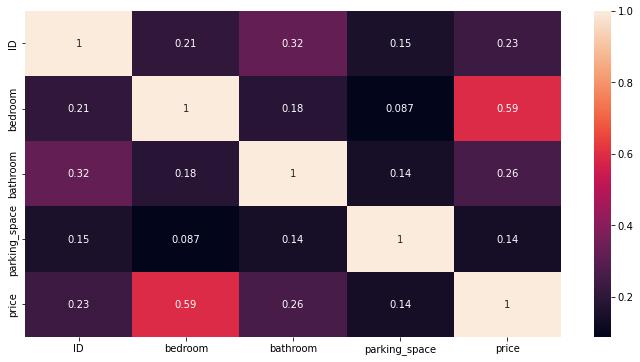

In [806]:
#heatmap of the correlation between the columns
plt.figure(figsize=(12,6))
sns.heatmap(model_data.corr(),annot=True)
plt.show()

# Importing for model development

In [807]:
import sklearn

In [808]:
from sklearn.preprocessing import LabelEncoder

In [809]:
# To encode non numericalvariabels into numericalrepresentation
encod_loc = LabelEncoder()

In [810]:
''' using the LabelEncoder object encod_loc to encode the categorical values in the 'location'
column of the DataFrame model_data into numeric representations.'''
num_loc = encod_loc.fit_transform(model_data['location'])

In [811]:
num_loc

array([19, 27, 12, ..., 30,  9, 24])

In [812]:
model_data['location']

0         Katsina
1            Ondo
2           Ekiti
3         Anambra
4            Kogi
           ...   
13995         Edo
13996      Kaduna
13997     Plateau
13998       Delta
13999    Nasarawa
Name: location, Length: 13299, dtype: object

In [813]:
# To encode non numericalvariabels into numericalrepresentation
encod_title = LabelEncoder()

''' using the LabelEncoder object encod_loc to encode the categorical values in the 'location'
column of the DataFrame model_data into numeric representations.'''
num_title = encod_title.fit_transform(model_data['Title'])

## new dataframe with numeric data....

In [814]:
#creating two new columns containing numerical data that corresponds to the loc and title column
model_data['num_loc'] = num_loc
model_data['num_title'] = num_title

C:\Users\HP 15 I3 TOUCH\AppData\Local\Temp\ipykernel_12172\3485985459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['num_loc'] = num_loc
C:\Users\HP 15 I3 TOUCH\AppData\Local\Temp\ipykernel_12172\3485985459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['num_title'] = num_title


In [815]:
model_data

,ID,bedroom,bathroom,parking_space,price,location,Title,num_loc,num_title
0,3583,2.0,2.0,1.0,1149999.565,Katsina,Semi-detached duplex,19,7
1,2748,4.0,2.0,4.0,1672416.689,Ondo,Apartment,27,0
2,9261,7.0,5.0,4.0,3364799.814,Ekiti,Mansion,12,5
3,2224,5.0,2.0,4.0,2410306.756,Anambra,Detached duplex,3,3
4,10300,4.0,5.0,6.0,2600700.898,Kogi,Terrace duplex,21,8
...,...,...,...,...,...,...,...,...,...
13995,6175,4.0,7.0,4.0,2367927.861,Edo,Bungalow,11,1
13996,9704,4.0,7.0,5.0,2228516.471,Kaduna,Apartment,17,0
13997,11190,8.0,6.0,5.0,2406812.693,Plateau,Bungalow,30,1
13998,9256,4.0,6.0,1.0,3348918.718,Delta,Flat,9,4


In [817]:
model_data.drop(['location','Title','ID'],inplace= True,axis = 1)

C:\Users\HP 15 I3 TOUCH\AppData\Local\Temp\ipykernel_12172\2522622195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.drop(['location','Title','ID'],inplace= True,axis = 1)


In [818]:
model_data

,bedroom,bathroom,parking_space,price,num_loc,num_title
0,2.0,2.0,1.0,1149999.565,19,7
1,4.0,2.0,4.0,1672416.689,27,0
2,7.0,5.0,4.0,3364799.814,12,5
3,5.0,2.0,4.0,2410306.756,3,3
4,4.0,5.0,6.0,2600700.898,21,8
...,...,...,...,...,...,...
13995,4.0,7.0,4.0,2367927.861,11,1
13996,4.0,7.0,5.0,2228516.471,17,0
13997,8.0,6.0,5.0,2406812.693,30,1
13998,4.0,6.0,1.0,3348918.718,9,4


## Data splitting

In [819]:
#To check column name
model_data.columns

Index(['bedroom', 'bathroom', 'parking_space', 'price', 'num_loc',
       'num_title'],
      dtype='object')

In [820]:
# Data Splitting
X=model_data[['bedroom', 'bathroom', 'parking_space', 'num_loc','num_title']]

In [821]:
#target variable
y= model_data['price']

# Importing more necessary libraries for model development

In [822]:
from sklearn.model_selection import train_test_split

In [823]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [824]:
from sklearn.linear_model import LinearRegression

In [825]:
# Model Development - Linear Regression
lm = LinearRegression()

In [826]:
lm

LinearRegression()

In [827]:
lm.fit(X_train,y_train)

LinearRegression()

# Model Coefficients

In [828]:
lm.coef_

array([189407.73822102,  59049.15047261,  34219.90670642,  -3299.22213259,
        44982.32652658])

In [829]:
print(lm.intercept_)

732574.0929974231


In [830]:
# This shows the coefficient per unit increase of a particular feature
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [831]:
cdf

,Coeff
bedroom,189407.738221
bathroom,59049.150473
parking_space,34219.906706
num_loc,-3299.222133
num_title,44982.326527


In [832]:
X_train.columns

Index(['bedroom', 'bathroom', 'parking_space', 'num_loc', 'num_title'], dtype='object')

Model Evaluation

In [833]:
from sklearn import metrics

In [834]:
predictions = lm.predict(X_test)

In [835]:
predictions

array([1063916.27106552, 1750988.68687769, 2649921.16686035, ...,
       1611986.40296818, 1244270.19426038, 1824462.41126116])

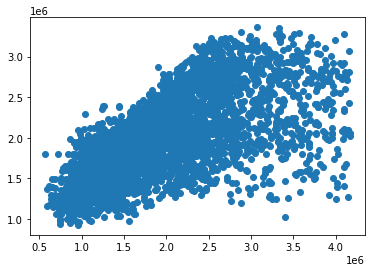

In [836]:
#To visualise data
plt.scatter(y_test,predictions)

The plot below shows that the more the bedrooms the higher the price would be.

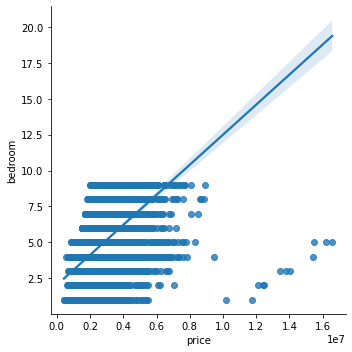

In [837]:

sns.lmplot(x='price', y='bedroom', data=data)
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

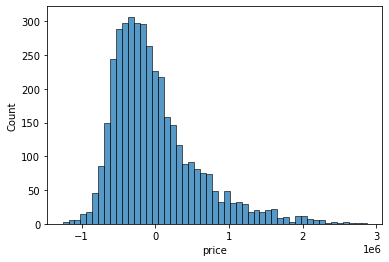

In [838]:
sns.histplot((y_test-predictions))

Scatter plot of real test values versus predicted model

Text(0, 0.5, 'Prediction Values')

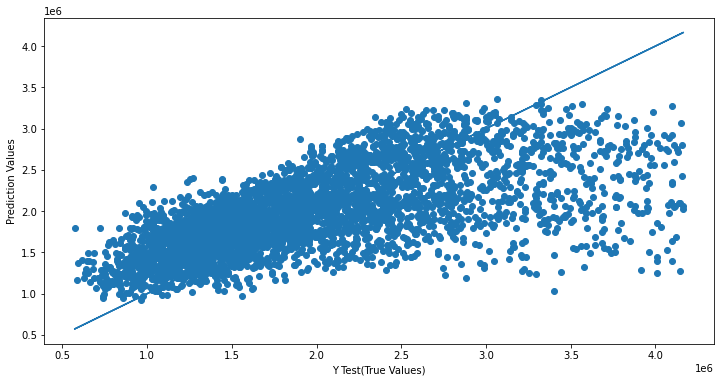

In [839]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Prediction Values')

Error Evaluation

In [840]:
#to show the mean average error,mean squared error and root mean square error of the model
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))

MAE 438023.802263587
MSE 338114033234.6009
RMSE 661.833666613891


# predicting on all the dataset

In [841]:
lm = LinearRegression()
lm.fit(X,y)
pred = lm.predict(X)

Text(0, 0.5, 'Prediction Values')

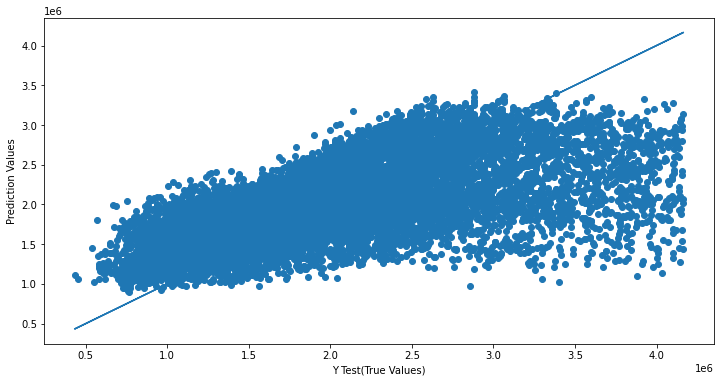

In [842]:
plt.figure(figsize=(12,6))
plt.scatter(y,pred)
plt.plot(y,y)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Prediction Values')

# Prediction on test data

In [843]:
data2


,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1
...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4,5,2
5996,2416,Adamawa,Terrace duplex,5,7,1
5997,10195,Oyo,Townhouse,4,1,4
5998,9455,Bauchi,Flat,3,7,5


In [845]:
#creating two new columns containing numerical data that corresponds to the loc and title column
new_title = encod_title.transform(data2['title'])
new_loc = encod_loc.transform(data2['loc'])

In [853]:
data2['num_loc'] = new_loc
data2['num_title'] = new_title

In [854]:
data2

,bedroom,bathroom,parking_space,location,Title,num_loc,num_title
0,4,1,2,18,6,18,6
1,2,2,4,1,0,1,0
2,2,7,2,1,1,1,1
3,9,5,2,23,5,23,5
4,5,6,1,14,7,14,7
...,...,...,...,...,...,...,...
5995,4,5,2,12,4,12,4
5996,5,7,1,1,8,1,8
5997,4,1,4,29,9,29,9
5998,3,7,5,4,4,4,4


In [855]:
data2.drop(['location','Title'],axis=1, inplace = True)

In [856]:
data2

,bedroom,bathroom,parking_space,num_loc,num_title
0,4,1,2,18,6
1,2,2,4,1,0
2,2,7,2,1,1
3,9,5,2,23,5
4,5,6,1,14,7
...,...,...,...,...,...
5995,4,5,2,12,4
5996,5,7,1,1,8
5997,4,1,4,29,9
5998,3,7,5,4,4


In [857]:
answers = lm.predict(data2)

In [861]:
test_data = pd.read_csv('Housing_dataset_test.csv')

In [863]:
test_data['Price'] =answers

In [865]:
test_data

,ID,loc,title,bedroom,bathroom,parking_space,Price
0,845,Kano,Penthouse,4,1,2,1.825176e+06
1,1924,Adamawa,Apartment,2,2,4,1.364708e+06
2,10718,Adamawa,Bungalow,2,7,2,1.631319e+06
3,12076,Lagos,Mansion,9,5,2,2.947898e+06
4,12254,Gombe,Semi-detached duplex,5,6,1,2.329857e+06
...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4,5,2,1.990483e+06
5996,2416,Adamawa,Terrace duplex,5,7,1,2.475369e+06
5997,10195,Oyo,Townhouse,4,1,4,1.991514e+06
5998,9455,Bauchi,Flat,3,7,5,2.048906e+06


In [866]:
result_df = test_data[['ID','Price']]

In [868]:
result_df.head()

,ID,Price
0,845,1.825176e+06
1,1924,1.364708e+06
2,10718,1.631319e+06
3,12076,2.947898e+06
4,12254,2.329857e+06


In [869]:
result_df.to_csv('Submission.csv')

# Conclusion

The number on bedrooms and bathrooms are the major determinant in the value of house prices by the coefficients as seen below. In the above I expolre my data extensively adding new columns and changing my text data to numerical data in order to add to my dataset. 

In [870]:
cdf

,Coeff
bedroom,189407.738221
bathroom,59049.150473
parking_space,34219.906706
num_loc,-3299.222133
num_title,44982.326527
